# 問２
* いくつかの方法でデータの中身の分析を行った後にいくつかの方法で分類を行いました。
* 最後にはシンプルなMLPでの予測も行っています。
* とにかく順番に実装のみを行ったので変数が大量に生成されてしまっています。すべてを同時に走らせるとメモリ不足になると思います。
* 前半の部分と後半の部分(MLP(DNN)の章)は分割して走らせたら動くと思います。

In [27]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Import data

In [28]:
data_path = "../.data/"

covtype_data = fetch_covtype(data_home=data_path)

In [29]:
x_df = pd.DataFrame(covtype_data.data, columns=covtype_data.feature_names)
y_df = pd.DataFrame(covtype_data.target, columns=covtype_data.target_names)
covtype_df = pd.concat([y_df, x_df], axis=1)
covtype_df

,Cover_Type,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,5,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,3,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,3,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,3,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,3,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
x_train_df, x_test_df, y_train_df, y_test_df = train_test_split(x_df, y_df, train_size=0.8, random_state=0, stratify=y_df)
print(f"x train : {x_train_df.shape}\nx test : {x_test_df.shape}\ny train : {y_train_df.shape}\ny test : {y_test_df.shape}")

x train : (464809, 54)
x test : (116203, 54)
y train : (464809, 1)
y test : (116203, 1)


In [31]:
x_train_arr = x_train_df.values
x_test_arr = x_test_df.values
y_train_arr = y_train_df.values.reshape(y_train_df.shape[0])
y_test_arr = y_test_df.values.reshape(y_test_df.shape[0])

In [32]:
y_train_arr.shape

(464809,)

# データの分析

In [8]:
print(x_df.isnull().all())
print(y_df.isnull().all())

Elevation                             False
Aspect                                False
Slope                                 False
Horizontal_Distance_To_Hydrology      False
Vertical_Distance_To_Hydrology        False
Horizontal_Distance_To_Roadways       False
Hillshade_9am                         False
Hillshade_Noon                        False
Hillshade_3pm                         False
Horizontal_Distance_To_Fire_Points    False
Wilderness_Area_0                     False
Wilderness_Area_1                     False
Wilderness_Area_2                     False
Wilderness_Area_3                     False
Soil_Type_0                           False
Soil_Type_1                           False
Soil_Type_2                           False
Soil_Type_3                           False
Soil_Type_4                           False
Soil_Type_5                           False
Soil_Type_6                           False
Soil_Type_7                           False
Soil_Type_8                     

# カテゴリ値なし

# 有用な特徴量だけ捉える

In [9]:
covtype_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cover_Type,581012.0,2.051471,1.396504,1.0,1.0,2.0,2.0,7.0
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0


In [10]:
covtype_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Cover_Type                          581012 non-null  int32  
 1   Elevation                           581012 non-null  float64
 2   Aspect                              581012 non-null  float64
 3   Slope                               581012 non-null  float64
 4   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 5   Vertical_Distance_To_Hydrology      581012 non-null  float64
 6   Horizontal_Distance_To_Roadways     581012 non-null  float64
 7   Hillshade_9am                       581012 non-null  float64
 8   Hillshade_Noon                      581012 non-null  float64
 9   Hillshade_3pm                       581012 non-null  float64
 10  Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 11  Wilderness_Area_0         

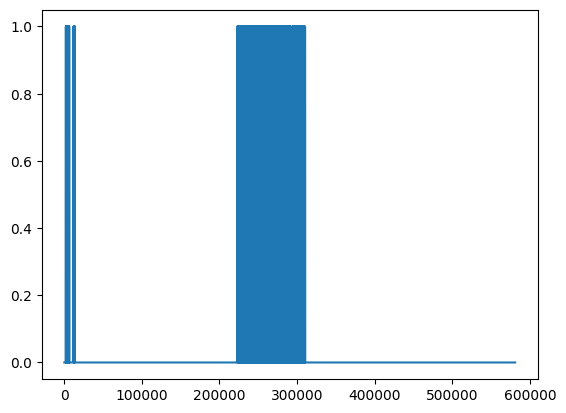

In [11]:
plt.plot(covtype_df["Soil_Type_0"])
plt.show()

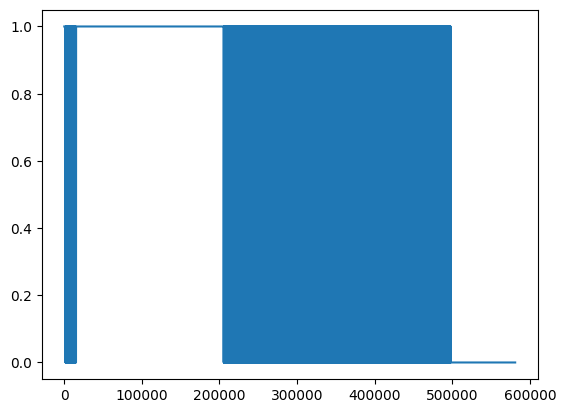

In [12]:
plt.plot(covtype_df["Wilderness_Area_0"])
plt.show()

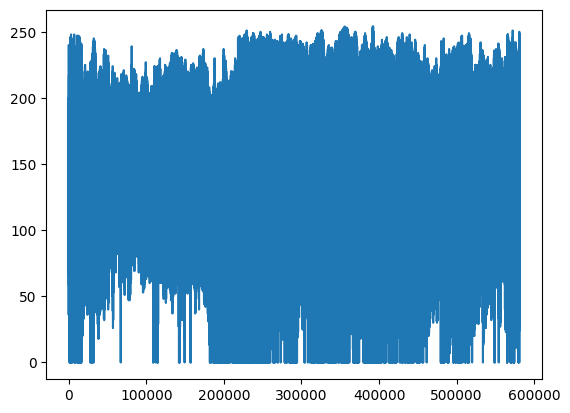

In [13]:
plt.plot(covtype_df["Hillshade_3pm"])
plt.show()

In [14]:
covtype_df.columns

Index(['Cover_Type', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2',
       'Wilderness_Area_3', 'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2',
       'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6',
       'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10',
       'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14',
       'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18',
       'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22',
       'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26',
       'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30',
       'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34',
       'Soil_Type_35', 'Soi

In [15]:
continuous_value_df = covtype_df[['Cover_Type', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']]
discrete_value_df = covtype_df[['Cover_Type', 'Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2',
       'Wilderness_Area_3', 'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2',
       'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6',
       'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10',
       'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14',
       'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18',
       'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22',
       'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26',
       'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30',
       'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34',
       'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38',
       'Soil_Type_39']]

<Axes: >

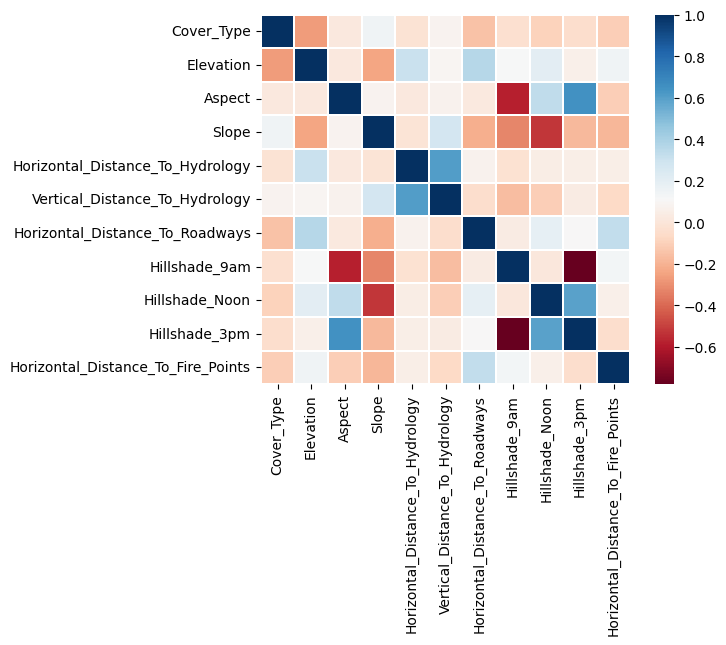

In [16]:
sns.heatmap(
    continuous_value_df.corr(),
    linewidths=0.1,
    vmax=1.0,
    square=True,
    cmap=plt.cm.RdBu,
    linecolor='white',
)

<Axes: >

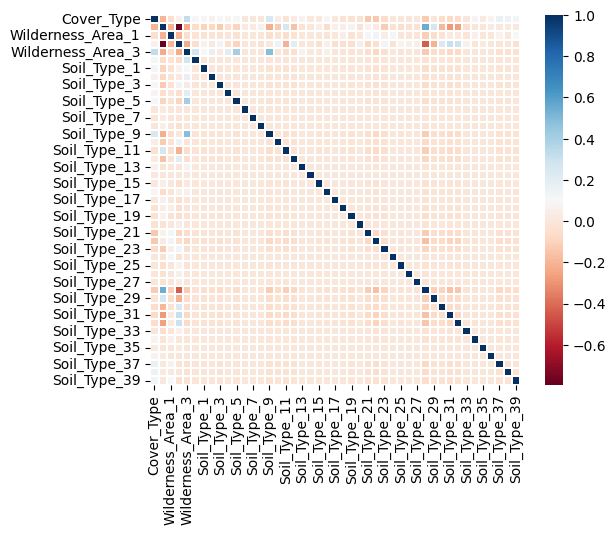

In [17]:
sns.heatmap(
    discrete_value_df.corr(),
    linewidths=0.2,
    vmax=1.0,
    square=True,
    cmap=plt.cm.RdBu,
    linecolor='white',
)

<Axes: xlabel='Cover_Type', ylabel='count'>

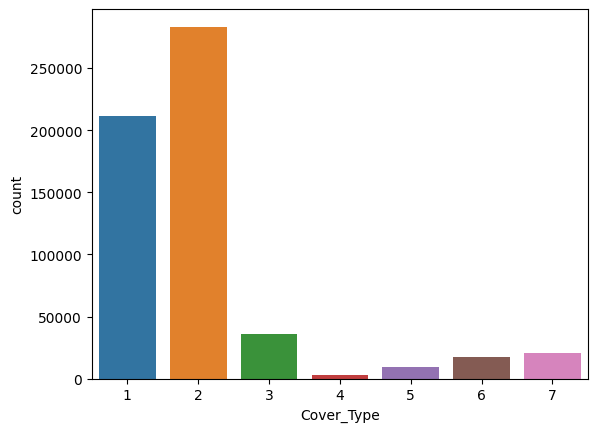

In [18]:
sns.countplot(data=covtype_df, x='Cover_Type')

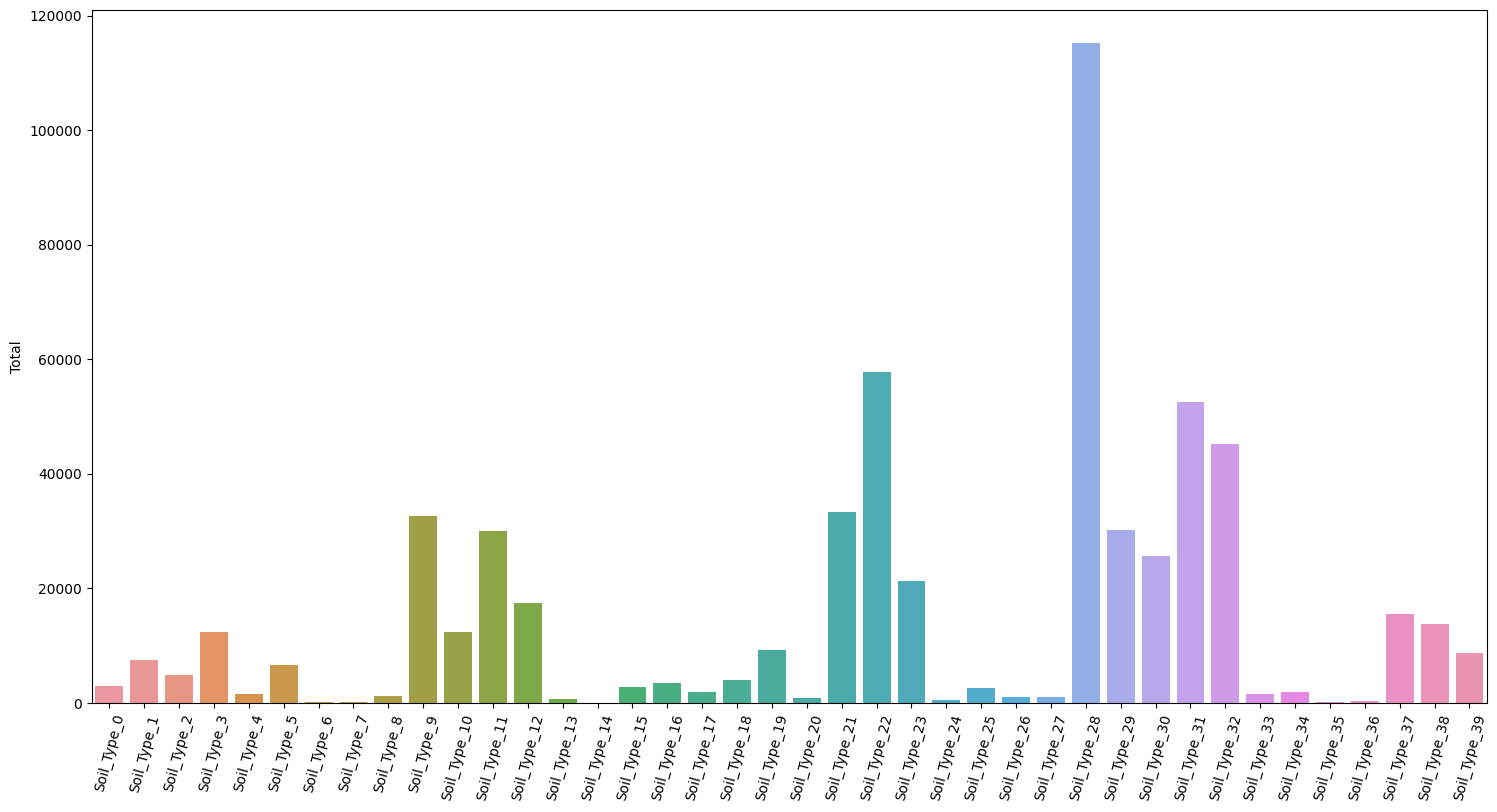

In [19]:
soil_types = covtype_df.iloc[:,15:].sum(axis=0,numeric_only=True)

plt.figure(figsize=(18,9))
sns.barplot(x=soil_types.index, y=soil_types.values)

plt.xticks(rotation= 75)
plt.ylabel('Total')

plt.show()

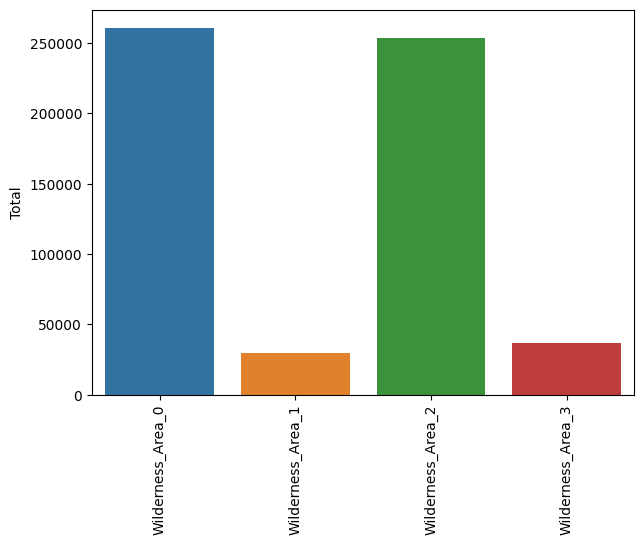

In [20]:
wilderness_areas = covtype_df.iloc[:,11:15].sum(axis=0)

plt.figure(figsize=(7,5))
sns.barplot(x=wilderness_areas.index, y=wilderness_areas.values)

plt.xticks(rotation=90)
plt.ylabel('Total')

plt.show()

In [21]:
covtype_df.corr().unstack().sort_values().drop_duplicates()

Wilderness_Area_0                 Wilderness_Area_2                -0.793593
Hillshade_3pm                     Hillshade_9am                    -0.780296
Wilderness_Area_3                 Elevation                        -0.619374
Hillshade_9am                     Aspect                           -0.579273
Slope                             Hillshade_Noon                   -0.526911
                                                                      ...   
Soil_Type_28                      Wilderness_Area_0                 0.550549
Hillshade_3pm                     Hillshade_Noon                    0.594274
Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology    0.606236
Hillshade_3pm                     Aspect                            0.646944
Cover_Type                        Cover_Type                        1.000000
Length: 1486, dtype: float64

# 連続値の規格化

In [33]:
scaler = StandardScaler()
standard_covtype_df = covtype_df.copy(deep=True)
standard_covtype_df[['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']] = scaler.fit_transform(standard_covtype_df[['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']])
standard_covtype_df

,Cover_Type,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,5,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,3,-2.012130,-0.023740,0.787408,-0.867697,-0.504653,-1.437962,1.040496,0.692069,-0.640851,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,3,-2.029988,-0.032675,0.653865,-0.952383,-0.590424,-1.446299,1.040496,0.692069,-0.614724,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,3,-2.047847,0.029873,0.386780,-0.985317,-0.676194,-1.449506,0.891075,0.894409,-0.327327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,3,-2.054990,0.128163,0.119694,-0.985317,-0.710502,-1.449506,0.666942,1.096749,0.012325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
std_x_df = standard_covtype_df[standard_covtype_df.columns[standard_covtype_df.columns != 'Cover_Type']]
std_y_df = standard_covtype_df[["Cover_Type"]]

In [35]:
std_x_train_df, std_x_test_df, std_y_train_df, std_y_test_df = train_test_split(std_x_df, std_y_df, train_size=0.8, random_state=0, stratify=std_y_df)
std_x_train_arr = std_x_train_df.values
std_x_test_arr = std_x_test_df.values
std_y_train_arr = std_y_train_df.values.reshape(std_y_train_df.shape[0])
std_y_test_arr = std_y_test_df.values.reshape(std_y_test_df.shape[0])

# SGD classifier

In [38]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(std_x_train_arr, std_y_train_arr)

SGDClassifier()

In [37]:
print(f"CV of train : {clf.score(x_train_arr, y_train_arr)}")
print(f"CV of test  : {clf.score(x_test_arr, y_test_arr)}")

CV of train : 0.17996209195605076
CV of test  : 0.17917781812861974


# LinearRegression

In [25]:
from sklearn import linear_model

linear_model = linear_model.LinearRegression()
linear_model.fit(x_train_arr, y_train_arr)

LinearRegression()

In [26]:
print(f"CV of train : {linear_model.score(x_train_arr, y_train_arr)}")
print(f"CV of test  : {linear_model.score(x_test_arr, y_test_arr)}")

CV of train : 0.31937992042670094
CV of test  : 0.317741187361279


# ロジスティック回帰

In [27]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(x_train_arr, y_train_arr)

print(f"CV of train : {logistic_model.score(x_train_arr, y_train_arr)}")
print(f"CV of test  : {logistic_model.score(x_test_arr, y_test_arr)}")

CV of train : 0.6629045478895632
CV of test  : 0.6633563677357728


c:\users\takam\desktop\機械学習\comp\tech_lou\.env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
"""
from sklearn import svm

cont_x_df = continuous_value_df[continuous_value_df.columns[continuous_value_df.columns != 'Cover_Type']]
cont_y_df = continuous_value_df[["Cover_Type"]]

cont_x_train_df, cont_x_test_df, cont_y_train_df, cont_y_test_df = train_test_split(cont_x_df, cont_y_df, train_size=0.8, random_state=0, stratify=cont_y_df)
cont_x_train_arr = cont_x_train_df.values
cont_x_test_arr = cont_x_test_df.values
cont_y_train_arr = cont_y_train_df.values.reshape(cont_y_train_df.shape[0])
cont_y_test_arr = cont_y_test_df.values.reshape(cont_y_test_df.shape[0])


linear_svm_model = svm.SVC(kernel='linear').fit(cont_x_train_arr, cont_y_train_arr)

print(f"CV of train : {linear_svm_model.score(cont_x_train_arr, cont_y_train_arr)}")
print(f"CV of test  : {linear_svm_model.score(cont_x_test_arr, cont_y_test_arr)}")

rbf_svm_model = svm.SVC(kernel='rbf').fit(cont_x_train_arr, cont_y_train_arr)

print(f"CV of train : {rbf_svm_model.score(cont_x_train_arr, cont_y_train_arr)}")
print(f"CV of test  : {rbf_svm_model.score(cont_x_test_arr, cont_y_test_arr)}")
"""
print("pass")


pass


# DNN
* ここ以下はDNNなのでここ以上の部分をすべて走らせた後だとメモリ不足になると思います。
* DNNはここ以下のコードのみで完結しているので、一度再起動をかけてからここ以下をすべて走らせれば上手く動くはずです。

In [ ]:
data_path = "../.data/"

covtype_data = fetch_covtype(data_home=data_path)

In [ ]:
x_df = pd.DataFrame(covtype_data.data, columns=covtype_data.feature_names)
y_df = pd.DataFrame(covtype_data.target, columns=covtype_data.target_names)
covtype_df = pd.concat([y_df, x_df], axis=1)
covtype_df

In [ ]:
scaler = StandardScaler()
standard_covtype_df = covtype_df.copy(deep=True)
standard_covtype_df[['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']] = scaler.fit_transform(standard_covtype_df[['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']])
standard_covtype_df

In [ ]:
std_x_df = standard_covtype_df[standard_covtype_df.columns[standard_covtype_df.columns != 'Cover_Type']]
std_y_df = standard_covtype_df[["Cover_Type"]]

In [ ]:
std_x_train_df, std_x_test_df, std_y_train_df, std_y_test_df = train_test_split(std_x_df, std_y_df, train_size=0.8, random_state=0, stratify=std_y_df)
std_x_train_arr = std_x_train_df.values
std_x_test_arr = std_x_test_df.values
std_y_train_arr = std_y_train_df.values.reshape(std_y_train_df.shape[0])
std_y_test_arr = std_y_test_df.values.reshape(std_y_test_df.shape[0])

In [6]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6275803137311327901
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1408099534
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15150190999571132654
 physical_device_desc: "device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:02:00.0, compute capability: 6.1"
 xla_global_id: 416903419]

In [7]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
dnn_x = std_x_df
dnn_y = to_categorical(std_y_df)
print(dnn_x.shape)
print(dnn_y.shape)

(581012, 54)
(581012, 8)


In [8]:
dnn_x_train, dnn_x_test, dnn_y_train, dnn_y_test = train_test_split(dnn_x, dnn_y, train_size=0.8, random_state=0, stratify=dnn_y)

In [9]:
import os
log_path = os.path.join(os.getcwd(), ".log")

In [13]:
dnn_model = Sequential()
dnn_model.add(Dense(units=54, activation='relu', input_dim=54))
dnn_model.add(Dense(units=48, activation='relu'))
dnn_model.add(Dense(units=32, activation='relu'))
dnn_model.add(Dense(units=16, activation='relu'))
dnn_model.add(Dense(units=8, activation='softmax'))

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    0.1,
    decay_steps=10,
    decay_rate=0.1)
lr_callback = keras.callbacks.LearningRateScheduler(lr_schedule)
tbc = TensorBoard(log_dir=log_path, histogram_freq=1)

dnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [14]:
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 54)                2970      
                                                                 
 dense_6 (Dense)             (None, 48)                2640      
                                                                 
 dense_7 (Dense)             (None, 32)                1568      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
Total params: 7,842
Trainable params: 7,842
Non-trainable params: 0
_________________________________________________________________


In [15]:
training_history = dnn_model.fit(dnn_x_train, dnn_y_train, validation_split=0.2, batch_size=1024, epochs=100, callbacks=[tbc, lr_callback])

Epoch 1/100
364/364 [==============================] - 3s 7ms/step - loss: 0.7787 - categorical_accuracy: 0.6921 - val_loss: 0.6087 - val_categorical_accuracy: 0.7557 - lr: 0.1000
Epoch 2/100
364/364 [==============================] - 2s 6ms/step - loss: 0.5797 - categorical_accuracy: 0.7656 - val_loss: 0.5696 - val_categorical_accuracy: 0.7695 - lr: 0.0794
Epoch 3/100
364/364 [==============================] - 2s 6ms/step - loss: 0.5440 - categorical_accuracy: 0.7795 - val_loss: 0.5229 - val_categorical_accuracy: 0.7871 - lr: 0.0631
Epoch 4/100
364/364 [==============================] - 2s 7ms/step - loss: 0.5213 - categorical_accuracy: 0.7868 - val_loss: 0.5151 - val_categorical_accuracy: 0.7869 - lr: 0.0501
Epoch 5/100
364/364 [==============================] - 3s 7ms/step - loss: 0.5012 - categorical_accuracy: 0.7941 - val_loss: 0.4929 - val_categorical_accuracy: 0.7984 - lr: 0.0398
Epoch 6/100
364/364 [==============================] - 3s 7ms/step - loss: 0.4865 - categorical_accu

Epoch 46/100
364/364 [==============================] - 3s 7ms/step - loss: 0.4336 - categorical_accuracy: 0.8228 - val_loss: 0.4396 - val_categorical_accuracy: 0.8206 - lr: 3.1623e-06
Epoch 47/100
364/364 [==============================] - 3s 8ms/step - loss: 0.4336 - categorical_accuracy: 0.8228 - val_loss: 0.4396 - val_categorical_accuracy: 0.8207 - lr: 2.5119e-06
Epoch 48/100
364/364 [==============================] - 3s 8ms/step - loss: 0.4336 - categorical_accuracy: 0.8228 - val_loss: 0.4396 - val_categorical_accuracy: 0.8207 - lr: 1.9953e-06
Epoch 49/100
364/364 [==============================] - 3s 8ms/step - loss: 0.4336 - categorical_accuracy: 0.8228 - val_loss: 0.4396 - val_categorical_accuracy: 0.8207 - lr: 1.5849e-06
Epoch 50/100
364/364 [==============================] - 3s 8ms/step - loss: 0.4336 - categorical_accuracy: 0.8228 - val_loss: 0.4396 - val_categorical_accuracy: 0.8207 - lr: 1.2589e-06
Epoch 51/100
364/364 [==============================] - 3s 7ms/step - loss:

364/364 [==============================] - 2s 7ms/step - loss: 0.4336 - categorical_accuracy: 0.8228 - val_loss: 0.4396 - val_categorical_accuracy: 0.8207 - lr: 1.2589e-10
Epoch 91/100
364/364 [==============================] - 2s 7ms/step - loss: 0.4336 - categorical_accuracy: 0.8228 - val_loss: 0.4396 - val_categorical_accuracy: 0.8207 - lr: 1.0000e-10
Epoch 92/100
364/364 [==============================] - 2s 7ms/step - loss: 0.4336 - categorical_accuracy: 0.8228 - val_loss: 0.4396 - val_categorical_accuracy: 0.8207 - lr: 7.9433e-11
Epoch 93/100
364/364 [==============================] - 2s 7ms/step - loss: 0.4336 - categorical_accuracy: 0.8228 - val_loss: 0.4396 - val_categorical_accuracy: 0.8207 - lr: 6.3096e-11
Epoch 94/100
364/364 [==============================] - 2s 7ms/step - loss: 0.4336 - categorical_accuracy: 0.8228 - val_loss: 0.4396 - val_categorical_accuracy: 0.8207 - lr: 5.0119e-11
Epoch 95/100
364/364 [==============================] - 2s 7ms/step - loss: 0.4336 - cat

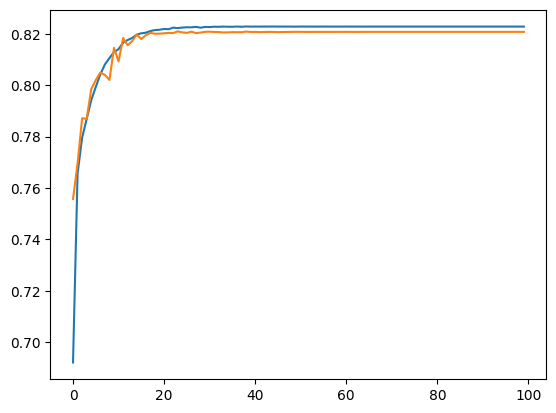

In [19]:
plt.plot(training_history.history['categorical_accuracy'])
plt.plot(training_history.history['val_categorical_accuracy'])
plt.show()

In [20]:
import os
log_path = os.path.join(os.getcwd(), ".models", "simple_dnn")
dnn_model.save(log_path)

INFO:tensorflow:Assets written to: C:\Users\takam\Desktop\機械学習\Comp\tech_lou\kadai1\.models\simple_dnn\assets


In [21]:
dnn_y_pred = dnn_model.predict(dnn_x_test)
dnn_y_pred = np.argmax(dnn_y_pred, axis=1)
dnn_y_pred

array([2, 3, 2, ..., 1, 2, 1], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(dnn_y_pred, np.argmax(dnn_y_test, axis=1))

0.8213729421787733